Step 1: Set up your environment

In [2]:
!pip install yfinance pandas numpy matplotlib seaborn scikit-learn tensorflow keras streamlit

  Using cached yfinance-0.2.55-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 4.2 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 6.7 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 6.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   -------------------------------

Step 2: Download Historical Stock Data

In [3]:
import yfinance as yf

#Example: Fetch data for Apple (AAPL)
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320436  24.789806  23.879985  24.778683  212818400
2015-01-05  23.635286  24.169166  23.448429  24.089084  257142000
2015-01-06  23.637505  23.897770  23.274910  23.699790  263188400
2015-01-07  23.968960  24.069062  23.735387  23.846612  160423600
2015-01-08  24.889904  24.947741  24.180289  24.298189  237458000


Step 3: Preprocess the Data

In [4]:
import pandas as pd
import numpy as np

#Keep only 'Close'
data = data[['Close']]

#Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

#Create sequences (for LSTM)
def create_dataset(data, time_step=60):
  X, y = [], []
  for i in range(time_step, len(data)):
    X.append(data[i-time_step:i, 0])
    y.append(data[i, 0])
  return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

Step 4: Build and Train LSTM Model

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

Matplotlib is building the font cache; this may take a moment.
c:\Integrated New\Clive\SH WORKS\vacation 25\Stock Price Prediction\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0372
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 5.0643e-04
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 4.2081e-04
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.0625e-04
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.0422e-04
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 3.8926e-04
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 3.8534e-04
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 3.6668e-04
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 3.9300e-04
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 3.4687e-04


Step 5: Make Predictions

In [6]:
#Invert scaling for comparison
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


Step 6: Visualize Results

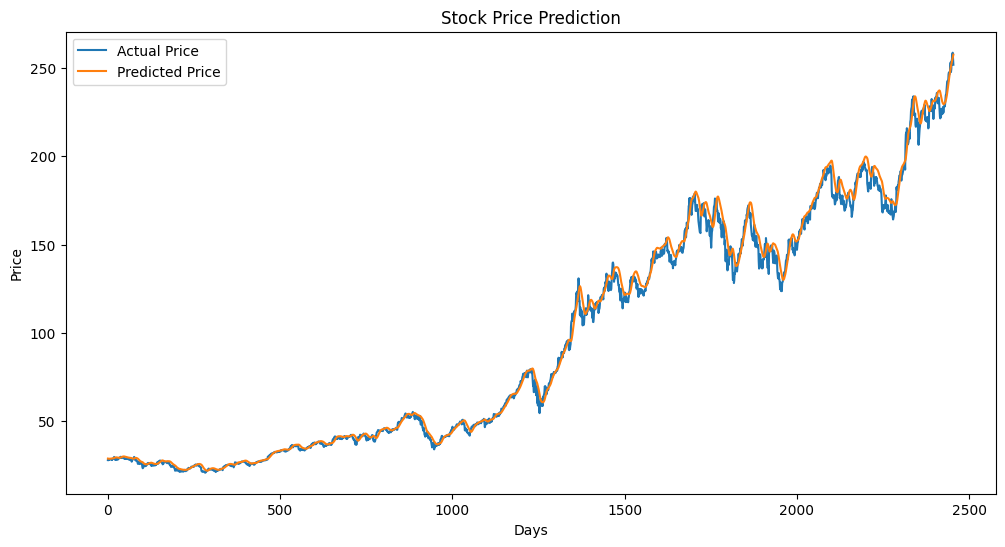

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
import numpy as np
import pandas as pd
import pickle

# Save predicted and real values
np.save("real_prices.npy", real_prices)
np.save("predicted_prices.npy", predicted_prices)

# Optional: save scaler or model if needed late
# pickle.dump(scaler, open("scaler.pkl", "wb"))
# model.save("lstm_model.keras")